## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Business Understanding

- Predictive sale pricing for relators working with sellers (price the home to sell)

### Problem/Stakeholder
We are a data science consulting company working with a real estate company to help assist with creating a pricing model for incoming listings. 

### Data Understanding

## Data Preparation

In [314]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

Pulling in data and exploring data prior to cleaning.

In [315]:
data = pd.read_csv('./data/kc_house_data.csv')

In [316]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [317]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We see we have null values in "waterfront", "view", and "yr_renovated" columns. 

In [319]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [320]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


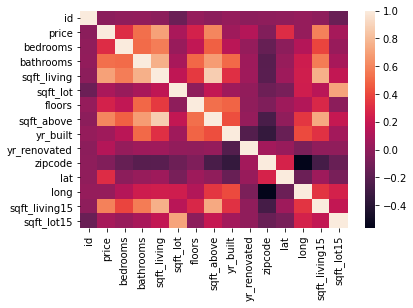

In [321]:
sns.heatmap(data.corr());

In [322]:
#Yr_renovated and price correlation .1296; might flatten past a certain year.  

In [323]:
data.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

We see we have both nulls and "0" values in this column.

In [324]:
data.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [325]:
17755 - 17011

744

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [327]:
data.drop(columns='yr_renovated', inplace=True)

'yr_renovated' only contains 744 values, which is less than 1% of the data. Dropping the column 'yr_renovated' due to the low value counts.

In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [329]:
data.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [330]:
data.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Only 60 null values, could drop those rows utilizing dropna or replace with our Mode value, "None."

In [331]:
data['view'].fillna("NONE", inplace=True)

In [332]:
data['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [334]:
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

No is overwhelming mode; could replace nulls with mode or create 3rd column "Unknown". 

In [335]:
data['waterfront'].fillna("UNKNOWN", inplace=True)

In [336]:
data['waterfront'].value_counts()

NO         19075
UNKNOWN     2376
YES          146
Name: waterfront, dtype: int64

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [338]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2190.0        1
1275.0        1
1245.0        1
1135.0        1
2180.0        1
Name: sqft_basement, Length: 304, dtype: int64

Here we see we have some values of "?"; we need to decide how to clean this data. We will replace "?" with 0 because a large proportion of our data is at 0.

In [339]:
data['sqft_basement'].replace(to_replace = '?', value = 0.0, inplace=True)

In [340]:
data['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
4130.0        1
1248.0        1
2850.0        1
666.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [341]:
data['sqft_basement'] = data['sqft_basement'].astype(str).astype(float)

In [342]:
data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

Since there is only 1 data point with a grade of (3 Poor), we will drop it as in contains <1% of the data.

In [343]:
data = data[data.grade != '3 Poor']

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     21596 non-null  object 
 9   view           21596 non-null  object 
 10  condition      21596 non-null  object 
 11  grade          21596 non-null  object 
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  float64
 14  yr_built       21596 non-null  int64  
 15  zipcode        21596 non-null  int64  
 16  lat            21596 non-null  float64
 17  long           21596 non-null  float64
 18  sqft_l

In [345]:
data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
Name: grade, dtype: int64

In [346]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016799,0.001061,0.005100,-0.012301,-0.131914,0.018577,-0.010853,-0.004382,0.021559,-0.008247,-0.001887,0.020727,-0.002733,-0.138560
price,-0.016799,1.000000,0.308749,0.525889,0.701914,0.089876,0.256780,0.605355,0.321092,0.053897,-0.053441,0.306653,0.022092,0.585228,0.082845
bedrooms,0.001061,0.308749,1.000000,0.514413,0.578137,0.032470,0.177866,0.479303,0.297200,0.155498,-0.154244,-0.010256,0.132266,0.393362,0.030692
bathrooms,0.005100,0.525889,0.514413,1.000000,0.755724,0.088375,0.502553,0.686629,0.278454,0.507103,-0.204893,0.024076,0.225060,0.569860,0.088307
sqft_living,-0.012301,0.701914,0.578137,0.755724,1.000000,0.173460,0.353912,0.876433,0.428642,0.318059,-0.199902,0.051967,0.241366,0.756393,0.184353
sqft_lot,-0.131914,0.089876,0.032470,0.088375,0.173460,1.000000,-0.004817,0.184146,0.015030,0.052946,-0.129591,-0.085533,0.230243,0.144763,0.718204
floors,0.018577,0.256780,0.177866,0.502553,0.353912,-0.004817,1.000000,0.523962,-0.241901,0.489163,-0.059588,0.049139,0.126019,0.280073,-0.010723
sqft_above,-0.010853,0.605355,0.479303,0.686629,0.876433,0.184146,0.523962,1.000000,-0.051224,0.423966,-0.261665,-0.001380,0.344990,0.731755,0.195086
sqft_basement,-0.004382,0.321092,0.297200,0.278454,0.428642,0.015030,-0.241901,-0.051224,1.000000,-0.130148,0.073242,0.109794,-0.142332,0.199265,0.015885
yr_built,0.021559,0.053897,0.155498,0.507103,0.318059,0.052946,0.489163,0.423966,-0.130148,1.000000,-0.347327,-0.148607,0.410169,0.326331,0.070781


Dropping ID and Date columns as they are not relevant to our analysis.

In [347]:
data.drop(columns=('id'), inplace=True)

In [348]:
data.drop(columns=('date'), inplace=True)

Adding price per sqft columnn to help with comparison.

In [349]:
data['price_per_sqft_living'] = (data['price']/data['sqft_living'])

In [350]:
data['price_per_sqft_living'].sort_values()

18248     87.588235
3781      87.647059
13812     87.713311
17183     88.000000
1383      88.028169
            ...    
9305     792.105263
8614     792.682927
10435    798.122066
4009     800.000000
19321    810.138889
Name: price_per_sqft_living, Length: 21596, dtype: float64

In [351]:
data['price_per_sqft_living'].describe()

count    21596.000000
mean       264.132269
std        109.990513
min         87.588235
25%        182.291667
50%        244.626805
75%        318.328353
max        810.138889
Name: price_per_sqft_living, dtype: float64

In [352]:
IQR = 318.33 - 182.29

In [353]:
IQR * 1.5

204.06

In [354]:
318.33 + 204.06

522.39

In [355]:
(data['price_per_sqft_living'] > 522).value_counts()

False    20889
True       707
Name: price_per_sqft_living, dtype: int64

In [356]:
data['price'].describe()

count    2.159600e+04
mean     5.403095e+05
std      3.673718e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [357]:
q3, q1 = np.percentile(data['price'], [75 ,25])
iqr = q3 - q1

In [358]:
iqr2 = iqr*1.5

In [359]:
q3 + iqr2

1129500.0

In [360]:
q1 - iqr2

-162500.0

In [361]:
(data['price'] > 1129500).value_counts()

False    20438
True      1158
Name: price, dtype: int64

In [362]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,188.050847
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,209.338521
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,233.766234
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,308.163265
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,303.571429


We want to further look into how distance from the epicenter of Seattle effects sale price. We will create a column calculating difference between home and Seattle epicenter. We will be utilizing the Seattle Art Museum coordinates for Seattle: (lat = 47.6077, long= -122.337).

In [363]:
from geopy.distance import geodesic
import geopy

In [364]:
print(geodesic((47.5112, -122.257), (47.6077, -122.337)).miles)

7.644653496774798


In [365]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,188.050847
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,209.338521
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,233.766234
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,308.163265
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,303.571429


In [366]:
coords = (47.6077, -122.337)

In [367]:
data['distance_from_Seattle'] = data.apply(lambda x: geopy.distance.distance((x.lat, x. long), coords).miles, axis=1)

In [368]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,188.050847,7.644653
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,209.338521,7.872439
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,233.766234,10.220653
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,308.163265,6.549707
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,303.571429,13.655673


We have cleaned all of our null values. 

Here, we create visualizations to see if the data is relatively normal and if we want to utilize the data. If we decide to utilize these variables and hot code, we need to drop a column to prevent multicollinearity. Column dropped becomes baseline. We will encode once we train the data. View article link: https://github.com/hoffm386/coefficients-of-dropped-categorical-variables

In [369]:
data['condition'] = pd.Categorical(data['condition'], ['Poor','Fair','Average','Good', 'Very Good'])

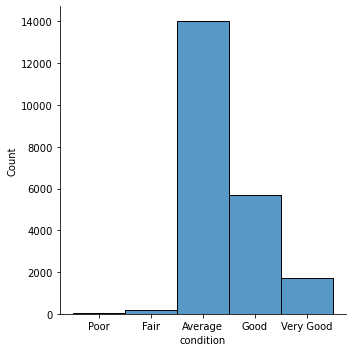

In [370]:
sns.displot(data=data, x='condition');

In [371]:
data['grade'] = pd.Categorical(data['grade'], ['3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])

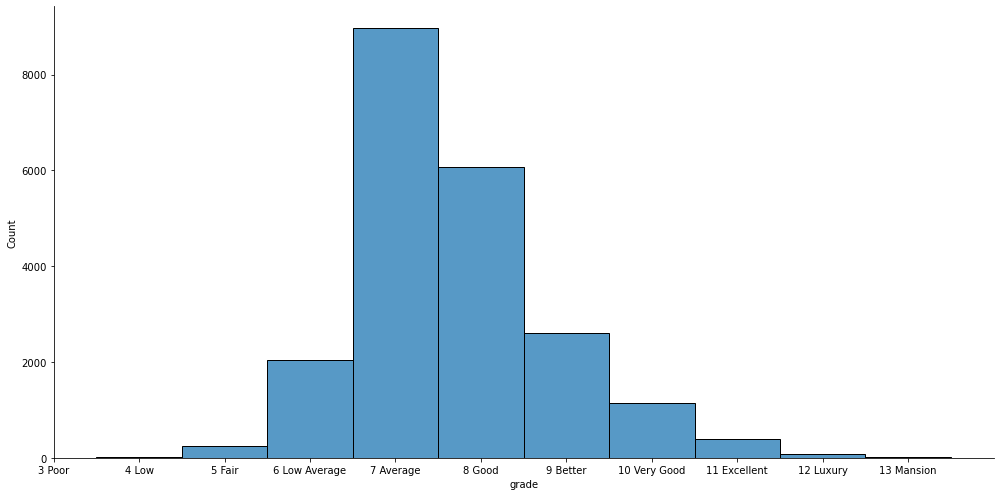

In [372]:
sns.displot(data=data, x='grade', height=7, aspect=2);

In [373]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
price,1.000000,0.308749,0.525889,0.701914,0.089876,0.256780,0.605355,0.321092,0.053897,-0.053441,0.306653,0.022092,0.585228,0.082845,0.556201,-0.283653
bedrooms,0.308749,1.000000,0.514413,0.578137,0.032470,0.177866,0.479303,0.297200,0.155498,-0.154244,-0.010256,0.132266,0.393362,0.030692,-0.205700,0.060773
bathrooms,0.525889,0.514413,1.000000,0.755724,0.088375,0.502553,0.686629,0.278454,0.507103,-0.204893,0.024076,0.225060,0.569860,0.088307,-0.090123,0.086247
sqft_living,0.701914,0.578137,0.755724,1.000000,0.173460,0.353912,0.876433,0.428642,0.318059,-0.199902,0.051967,0.241366,0.756393,0.184353,-0.091011,0.078417
sqft_lot,0.089876,0.032470,0.088375,0.173460,1.000000,-0.004817,0.184146,0.015030,0.052946,-0.129591,-0.085533,0.230243,0.144763,0.718204,-0.034748,0.243477
floors,0.256780,0.177866,0.502553,0.353912,-0.004817,1.000000,0.523962,-0.241901,0.489163,-0.059588,0.049139,0.126019,0.280073,-0.010723,0.004744,0.004315
sqft_above,0.605355,0.479303,0.686629,0.876433,0.184146,0.523962,1.000000,-0.051224,0.423966,-0.261665,-0.001380,0.344990,0.731755,0.195086,-0.087415,0.194830
sqft_basement,0.321092,0.297200,0.278454,0.428642,0.015030,-0.241901,-0.051224,1.000000,-0.130148,0.073242,0.109794,-0.142332,0.199265,0.015885,-0.023515,-0.199030
yr_built,0.053897,0.155498,0.507103,0.318059,0.052946,0.489163,0.423966,-0.130148,1.000000,-0.347327,-0.148607,0.410169,0.326331,0.070781,-0.289918,0.391813
zipcode,-0.053441,-0.154244,-0.204893,-0.199902,-0.129591,-0.059588,-0.261665,0.073242,-0.347327,1.000000,0.266666,-0.564230,-0.279358,-0.147298,0.172880,-0.526220


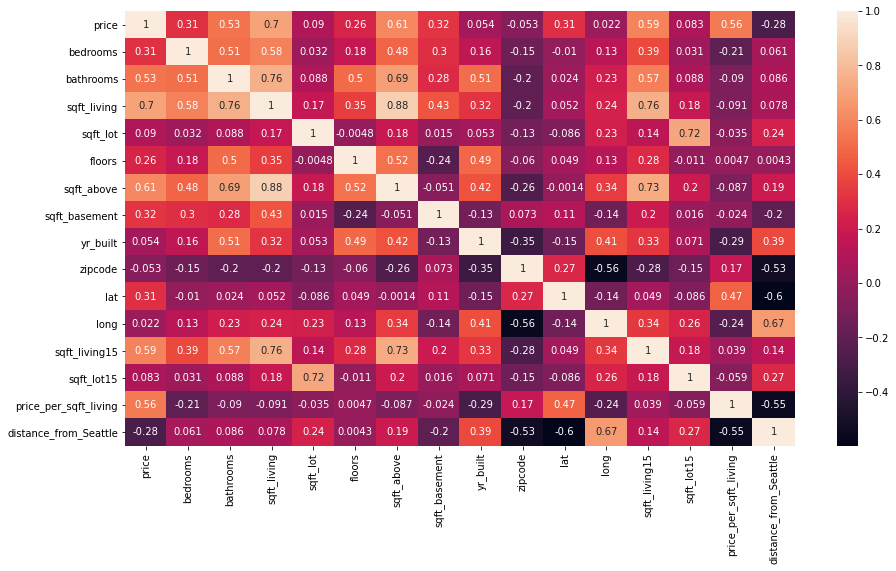

In [374]:
cor = data.corr()

plt.figure(figsize = (15, 8))
sns.heatmap(cor, annot=True);

We see that there is a large difference in the correlations between codition and price and grade and price, even though the columns seem to describe similar attributes. 

- 'sqft_living' highly correlated to 'bathrooms', 'grade', 'sqft_above', and 'sqft_living15'
- 'sqft_lot' is highly correlated to 'sqft_lot15'

Train test split. 

In [375]:
X, y = data.drop(columns='price'), data['price']

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [377]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17276, 19) (4320, 19) (17276,) (4320,)


In [378]:
training_data, testing_data = train_test_split(data, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 17276
No. of testing examples: 4320


In [379]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   price                  17276 non-null  float64 
 1   bedrooms               17276 non-null  int64   
 2   bathrooms              17276 non-null  float64 
 3   sqft_living            17276 non-null  int64   
 4   sqft_lot               17276 non-null  int64   
 5   floors                 17276 non-null  float64 
 6   waterfront             17276 non-null  object  
 7   view                   17276 non-null  object  
 8   condition              17276 non-null  category
 9   grade                  17276 non-null  category
 10  sqft_above             17276 non-null  int64   
 11  sqft_basement          17276 non-null  float64 
 12  yr_built               17276 non-null  int64   
 13  zipcode                17276 non-null  int64   
 14  lat                    17276 non-nu

In [380]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 3991 to 13008
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   price                  4320 non-null   float64 
 1   bedrooms               4320 non-null   int64   
 2   bathrooms              4320 non-null   float64 
 3   sqft_living            4320 non-null   int64   
 4   sqft_lot               4320 non-null   int64   
 5   floors                 4320 non-null   float64 
 6   waterfront             4320 non-null   object  
 7   view                   4320 non-null   object  
 8   condition              4320 non-null   category
 9   grade                  4320 non-null   category
 10  sqft_above             4320 non-null   int64   
 11  sqft_basement          4320 non-null   float64 
 12  yr_built               4320 non-null   int64   
 13  zipcode                4320 non-null   int64   
 14  lat                    4320 non-null

In [381]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
17843,3,2.25,1980,8000,1.0,NO,NONE,Good,9 Better,1560,420.0,1974,98023,47.3149,-122.378,2360,8000,148.989899,20.318780
16911,3,1.00,890,9870,1.0,UNKNOWN,NONE,Good,7 Average,890,0.0,1960,98056,47.5398,-122.178,1270,9861,402.247191,8.789729
20876,4,3.00,5370,69848,2.0,UNKNOWN,NONE,Average,10 Very Good,3500,1870.0,2005,98042,47.3166,-122.046,4443,94403,147.113594,24.295918
14355,3,1.75,1600,8400,1.0,NO,NONE,Very Good,8 Good,1600,0.0,1963,98006,47.5479,-122.179,2210,8400,300.000000,8.462936
15790,3,2.25,2860,10625,1.0,NO,EXCELLENT,Average,10 Very Good,1920,940.0,1976,98115,47.6915,-122.273,2860,8075,416.083916,6.514901


In [382]:
training_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
17843,295000.0,3,2.25,1980,8000,1.0,NO,NONE,Good,9 Better,1560,420.0,1974,98023,47.3149,-122.378,2360,8000,148.989899,20.318780
16911,358000.0,3,1.00,890,9870,1.0,UNKNOWN,NONE,Good,7 Average,890,0.0,1960,98056,47.5398,-122.178,1270,9861,402.247191,8.789729
20876,790000.0,4,3.00,5370,69848,2.0,UNKNOWN,NONE,Average,10 Very Good,3500,1870.0,2005,98042,47.3166,-122.046,4443,94403,147.113594,24.295918
14355,480000.0,3,1.75,1600,8400,1.0,NO,NONE,Very Good,8 Good,1600,0.0,1963,98006,47.5479,-122.179,2210,8400,300.000000,8.462936
15790,1190000.0,3,2.25,2860,10625,1.0,NO,EXCELLENT,Average,10 Very Good,1920,940.0,1976,98115,47.6915,-122.273,2860,8075,416.083916,6.514901


In [383]:
y_train.head()

17843     295000.0
16911     358000.0
20876     790000.0
14355     480000.0
15790    1190000.0
Name: price, dtype: float64

In [384]:
print(y.shape)

(21596,)


Above is a sanity check that our training_data lines up with our X_train and our y_train.

We need to deal with our categorical variables, which we will convert utilizing One Hot Encoding. When modeling, we will have to remove one encoder from each category. 

In [385]:
categoricals = ['view', 'waterfront', 'condition', 'grade']
X_train_dummies = pd.get_dummies(X_train[categoricals], prefix=categoricals)
X_train_dummies

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_NO,waterfront_UNKNOWN,waterfront_YES,condition_Poor,condition_Fair,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
17843,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16911,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
20876,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14355,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15790,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21246,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1175,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2934,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [386]:
categoricals = ['view', 'waterfront', 'condition', 'grade']
X_test_dummies = pd.get_dummies(X_test[categoricals], prefix=categoricals)
X_test_dummies

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_NO,waterfront_UNKNOWN,waterfront_YES,condition_Poor,condition_Fair,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
3991,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16939,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9467,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20168,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10554,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5671,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10944,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18174,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [387]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   bedrooms               17276 non-null  int64   
 1   bathrooms              17276 non-null  float64 
 2   sqft_living            17276 non-null  int64   
 3   sqft_lot               17276 non-null  int64   
 4   floors                 17276 non-null  float64 
 5   waterfront             17276 non-null  object  
 6   view                   17276 non-null  object  
 7   condition              17276 non-null  category
 8   grade                  17276 non-null  category
 9   sqft_above             17276 non-null  int64   
 10  sqft_basement          17276 non-null  float64 
 11  yr_built               17276 non-null  int64   
 12  zipcode                17276 non-null  int64   
 13  lat                    17276 non-null  float64 
 14  long                   17276 non-nu

Dropping the categorical columns so we can add the dummied columns.

In [388]:
X_train.drop(['view', 'condition', 'grade', 'waterfront'], axis=1, inplace=True)

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [389]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               17276 non-null  int64  
 1   bathrooms              17276 non-null  float64
 2   sqft_living            17276 non-null  int64  
 3   sqft_lot               17276 non-null  int64  
 4   floors                 17276 non-null  float64
 5   sqft_above             17276 non-null  int64  
 6   sqft_basement          17276 non-null  float64
 7   yr_built               17276 non-null  int64  
 8   zipcode                17276 non-null  int64  
 9   lat                    17276 non-null  float64
 10  long                   17276 non-null  float64
 11  sqft_living15          17276 non-null  int64  
 12  sqft_lot15             17276 non-null  int64  
 13  price_per_sqft_living  17276 non-null  float64
 14  distance_from_Seattle  17276 non-null  float64
dtyp

In [390]:
X_test.drop(['view', 'condition', 'grade', 'waterfront'], axis=1, inplace=True)

In [391]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 3991 to 13008
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               4320 non-null   int64  
 1   bathrooms              4320 non-null   float64
 2   sqft_living            4320 non-null   int64  
 3   sqft_lot               4320 non-null   int64  
 4   floors                 4320 non-null   float64
 5   sqft_above             4320 non-null   int64  
 6   sqft_basement          4320 non-null   float64
 7   yr_built               4320 non-null   int64  
 8   zipcode                4320 non-null   int64  
 9   lat                    4320 non-null   float64
 10  long                   4320 non-null   float64
 11  sqft_living15          4320 non-null   int64  
 12  sqft_lot15             4320 non-null   int64  
 13  price_per_sqft_living  4320 non-null   float64
 14  distance_from_Seattle  4320 non-null   float64
dtype

In [392]:
X_test = X_test.join(X_test_dummies)

In [393]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 3991 to 13008
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               4320 non-null   int64  
 1   bathrooms              4320 non-null   float64
 2   sqft_living            4320 non-null   int64  
 3   sqft_lot               4320 non-null   int64  
 4   floors                 4320 non-null   float64
 5   sqft_above             4320 non-null   int64  
 6   sqft_basement          4320 non-null   float64
 7   yr_built               4320 non-null   int64  
 8   zipcode                4320 non-null   int64  
 9   lat                    4320 non-null   float64
 10  long                   4320 non-null   float64
 11  sqft_living15          4320 non-null   int64  
 12  sqft_lot15             4320 non-null   int64  
 13  price_per_sqft_living  4320 non-null   float64
 14  distance_from_Seattle  4320 non-null   float64
 15  

In [394]:
X_train = X_train.join(X_train_dummies)

In [395]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               17276 non-null  int64  
 1   bathrooms              17276 non-null  float64
 2   sqft_living            17276 non-null  int64  
 3   sqft_lot               17276 non-null  int64  
 4   floors                 17276 non-null  float64
 5   sqft_above             17276 non-null  int64  
 6   sqft_basement          17276 non-null  float64
 7   yr_built               17276 non-null  int64  
 8   zipcode                17276 non-null  int64  
 9   lat                    17276 non-null  float64
 10  long                   17276 non-null  float64
 11  sqft_living15          17276 non-null  int64  
 12  sqft_lot15             17276 non-null  int64  
 13  price_per_sqft_living  17276 non-null  float64
 14  distance_from_Seattle  17276 non-null  float64
 15 

In [396]:
training_data = X_train.join(y_train)

In [397]:
training_data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,...,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,price
bedrooms,1.000000,0.527799,0.596137,0.034978,0.183881,0.493947,0.307867,0.160679,-0.163122,-0.011939,...,-0.119792,-0.247899,-0.107550,0.077041,0.166574,0.138391,0.122874,0.062507,0.037896,0.319467
bathrooms,0.527799,1.000000,0.758252,0.089691,0.502104,0.690250,0.277937,0.508499,-0.205400,0.021454,...,-0.137695,-0.367772,-0.312582,0.188691,0.266049,0.270647,0.249096,0.170774,0.102700,0.529186
sqft_living,0.596137,0.758252,1.000000,0.173248,0.349527,0.876143,0.431235,0.315131,-0.201046,0.049361,...,-0.127652,-0.312441,-0.353836,0.069594,0.315228,0.365674,0.345622,0.250528,0.148885,0.705037
sqft_lot,0.034978,0.089691,0.173248,1.000000,-0.003145,0.179762,0.022921,0.049037,-0.126287,-0.081565,...,0.022935,-0.017295,-0.066041,-0.022991,0.043717,0.074570,0.074839,0.067363,0.007684,0.089471
floors,0.183881,0.502104,0.349527,-0.003145,1.000000,0.521912,-0.245726,0.487306,-0.055271,0.048492,...,-0.080243,-0.229985,-0.310021,0.203985,0.242653,0.176036,0.117874,0.057877,0.022414,0.256185
sqft_above,0.493947,0.690250,0.876143,0.179762,0.521912,1.000000,-0.049013,0.420195,-0.260041,-0.003698,...,-0.109088,-0.280466,-0.385172,0.059401,0.341157,0.375497,0.342040,0.233194,0.125581,0.608112
sqft_basement,0.307867,0.277937,0.431235,0.022921,-0.245726,-0.049013,1.000000,-0.127536,0.065852,0.109042,...,-0.060002,-0.121658,-0.014760,0.032814,0.016324,0.056153,0.075930,0.085615,0.075084,0.323081
yr_built,0.160679,0.508499,0.315131,0.049037,0.487306,0.420195,-0.127536,1.000000,-0.343661,-0.148858,...,-0.132021,-0.313780,-0.210443,0.199800,0.220700,0.149212,0.099049,0.049004,0.005670,0.057282
zipcode,-0.163122,-0.205400,-0.201046,-0.126287,-0.055271,-0.260041,0.065852,-0.343661,1.000000,0.267355,...,0.008117,0.147884,0.067613,-0.053261,-0.083998,-0.071314,-0.055997,-0.041716,-0.001770,-0.058123
lat,-0.011939,0.021454,0.049361,-0.081565,0.048492,-0.003698,0.109042,-0.148858,0.267355,1.000000,...,-0.046692,-0.061335,-0.037577,0.022542,0.041842,0.053392,0.039287,0.015628,0.012443,0.302195


### Scaling Data

In [398]:
ss=StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

In [399]:
X_test_scaled = ss.transform(X_test)

In [400]:
X_train_scaled

array([[-0.40654188,  0.1771021 , -0.10792798, ..., -0.13759531,
        -0.06647259, -0.02406601],
       [-0.40654188, -1.44603633, -1.29085128, ..., -0.13759531,
        -0.06647259, -0.02406601],
       [ 0.69413475,  1.15098517,  3.571072  , ..., -0.13759531,
        -0.06647259, -0.02406601],
       ...,
       [-1.50721851, -0.47215327, -0.8676035 , ..., -0.13759531,
        -0.06647259, -0.02406601],
       [ 0.69413475,  0.50172979,  1.14011036, ..., -0.13759531,
        -0.06647259, -0.02406601],
       [-0.40654188, -0.79678096, -0.7265209 , ..., -0.13759531,
        -0.06647259, -0.02406601]])

In [401]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.score(X_train_scaled, y_train)


0.9014068321415053

In [402]:
corr = training_data.corr()

In [403]:
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,...,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,price
bedrooms,1.000000,0.527799,0.596137,0.034978,0.183881,0.493947,0.307867,0.160679,-0.163122,-0.011939,...,-0.119792,-0.247899,-0.107550,0.077041,0.166574,0.138391,0.122874,0.062507,0.037896,0.319467
bathrooms,0.527799,1.000000,0.758252,0.089691,0.502104,0.690250,0.277937,0.508499,-0.205400,0.021454,...,-0.137695,-0.367772,-0.312582,0.188691,0.266049,0.270647,0.249096,0.170774,0.102700,0.529186
sqft_living,0.596137,0.758252,1.000000,0.173248,0.349527,0.876143,0.431235,0.315131,-0.201046,0.049361,...,-0.127652,-0.312441,-0.353836,0.069594,0.315228,0.365674,0.345622,0.250528,0.148885,0.705037
sqft_lot,0.034978,0.089691,0.173248,1.000000,-0.003145,0.179762,0.022921,0.049037,-0.126287,-0.081565,...,0.022935,-0.017295,-0.066041,-0.022991,0.043717,0.074570,0.074839,0.067363,0.007684,0.089471
floors,0.183881,0.502104,0.349527,-0.003145,1.000000,0.521912,-0.245726,0.487306,-0.055271,0.048492,...,-0.080243,-0.229985,-0.310021,0.203985,0.242653,0.176036,0.117874,0.057877,0.022414,0.256185
sqft_above,0.493947,0.690250,0.876143,0.179762,0.521912,1.000000,-0.049013,0.420195,-0.260041,-0.003698,...,-0.109088,-0.280466,-0.385172,0.059401,0.341157,0.375497,0.342040,0.233194,0.125581,0.608112
sqft_basement,0.307867,0.277937,0.431235,0.022921,-0.245726,-0.049013,1.000000,-0.127536,0.065852,0.109042,...,-0.060002,-0.121658,-0.014760,0.032814,0.016324,0.056153,0.075930,0.085615,0.075084,0.323081
yr_built,0.160679,0.508499,0.315131,0.049037,0.487306,0.420195,-0.127536,1.000000,-0.343661,-0.148858,...,-0.132021,-0.313780,-0.210443,0.199800,0.220700,0.149212,0.099049,0.049004,0.005670,0.057282
zipcode,-0.163122,-0.205400,-0.201046,-0.126287,-0.055271,-0.260041,0.065852,-0.343661,1.000000,0.267355,...,0.008117,0.147884,0.067613,-0.053261,-0.083998,-0.071314,-0.055997,-0.041716,-0.001770,-0.058123
lat,-0.011939,0.021454,0.049361,-0.081565,0.048492,-0.003698,0.109042,-0.148858,0.267355,1.000000,...,-0.046692,-0.061335,-0.037577,0.022542,0.041842,0.053392,0.039287,0.015628,0.012443,0.302195


In [404]:
#remove correlation of features with themselves
corr = corr[corr < 1]

#top positively correlated
corr[corr < 1].unstack().sort_values(ascending=False)[:20]

sqft_living            sqft_above               0.876143
sqft_above             sqft_living              0.876143
bathrooms              sqft_living              0.758252
sqft_living            bathrooms                0.758252
                       sqft_living15            0.755133
sqft_living15          sqft_living              0.755133
sqft_above             sqft_living15            0.732228
sqft_living15          sqft_above               0.732228
sqft_lot15             sqft_lot                 0.712525
sqft_lot               sqft_lot15               0.712525
price                  sqft_living              0.705037
sqft_living            price                    0.705037
bathrooms              sqft_above               0.690250
sqft_above             bathrooms                0.690250
distance_from_Seattle  long                     0.672425
long                   distance_from_Seattle    0.672425
price                  sqft_above               0.608112
sqft_above             price   

In [405]:
corr.unstack().sort_values(ascending=True)[:20]

waterfront_UNKNOWN     waterfront_NO           -0.964653
waterfront_NO          waterfront_UNKNOWN      -0.964653
condition_Good         condition_Average       -0.813462
condition_Average      condition_Good          -0.813462
view_AVERAGE           view_NONE               -0.656782
view_NONE              view_AVERAGE            -0.656782
distance_from_Seattle  lat                     -0.593677
lat                    distance_from_Seattle   -0.593677
zipcode                long                    -0.562826
long                   zipcode                 -0.562826
price_per_sqft_living  distance_from_Seattle   -0.549647
distance_from_Seattle  price_per_sqft_living   -0.549647
grade_7 Average        grade_8 Good            -0.526582
grade_8 Good           grade_7 Average         -0.526582
distance_from_Seattle  zipcode                 -0.524598
zipcode                distance_from_Seattle   -0.524598
view_NONE              view_GOOD               -0.470855
view_GOOD              view_NON

Shows variables that are highly correlated.

In [406]:
price_corr = abs(training_data.corr()['price']).sort_values(ascending = False)
price_corr

price                    1.000000
sqft_living              0.705037
sqft_above               0.608112
sqft_living15            0.584559
price_per_sqft_living    0.548454
bathrooms                0.529186
view_NONE                0.352862
grade_11 Excellent       0.352644
grade_10 Very Good       0.333804
sqft_basement            0.323081
bedrooms                 0.319467
grade_7 Average          0.310763
grade_12 Luxury          0.306521
lat                      0.302195
view_EXCELLENT           0.294856
distance_from_Seattle    0.280633
floors                   0.256185
waterfront_YES           0.255937
grade_9 Better           0.234584
grade_13 Mansion         0.228527
grade_6 Low Average      0.210839
view_GOOD                0.181244
view_AVERAGE             0.146981
view_FAIR                0.094922
sqft_lot                 0.089471
sqft_lot15               0.086093
grade_5 Fair             0.084315
zipcode                  0.058123
yr_built                 0.057282
waterfront_NO 

Arranging correlation of variables to price from highest to lowest based on training data.

# Models

First, we will look at a Dummy Model. 

In [407]:
dummy_regr = DummyRegressor(strategy="mean")

In [408]:
dummy_regr.fit(X, y)

DummyRegressor()

In [409]:
dummy_regr.predict(X)

array([540309.45999259, 540309.45999259, 540309.45999259, ...,
       540309.45999259, 540309.45999259, 540309.45999259])

In [410]:
dummy_regr.score(X, y)

0.0

(array([8.3530e+03, 1.0165e+04, 2.5810e+03, 3.9500e+02, 7.2000e+01,
        2.3000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  370.,  1687.,  3004.,  4321.,  5638.,  6955.,  8272.,  9589.,
        10906., 12223., 13540.]),
 <BarContainer object of 10 artists>)

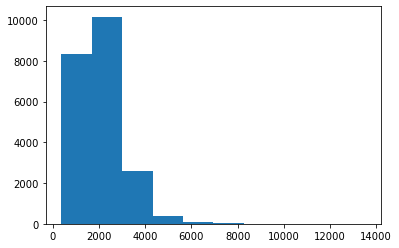

In [411]:
plt.hist(data['sqft_living'])

(array([1.9052e+04, 2.1180e+03, 2.9800e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <BarContainer object of 10 artists>)

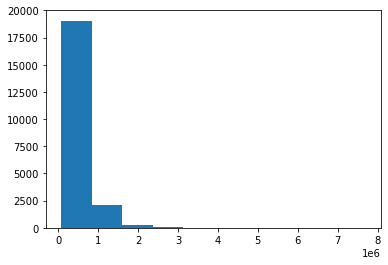

In [412]:
plt.hist(data['price'])

(array([3325., 6408., 5704., 3134., 1614.,  700.,  376.,  191.,   98.,
          46.]),
 array([ 87.58823529, 159.84330065, 232.09836601, 304.35343137,
        376.60849673, 448.86356209, 521.11862745, 593.37369281,
        665.62875817, 737.88382353, 810.13888889]),
 <BarContainer object of 10 artists>)

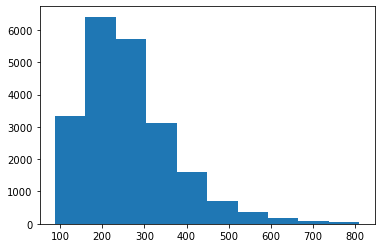

In [413]:
plt.hist(data['price_per_sqft_living'])

Starting with our simple model, we will look at the model utilizing sqft_living as our independent variable based on it having the highest correlation with price.

In [458]:
y = training_data ['price']
X = training_data [['sqft_living']]

lr = sm.OLS(endog=y, exog=sm.add_constant(X))

In [459]:
simple_model_summary = lr.fit().summary()

In [460]:
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.707e+04
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:24:05   Log-Likelihood:            -2.3995e+05
No. Observations:               17276   AIC:                         4.799e+05
Df Residuals:                   17274   BIC:                         4.799e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.513e+04   4893.060     -9.224      0.000   -5.47e+04   -3.55e+04
sqft_living   281.0994      2.151    130.665      0.000     276.883     285.316
==============================================================================
Omnibus:                    12320.858   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539419.118
Skew:                           2.931   Prob(JB):                         0.00
Kurtosis:                      29.739   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For our simple summary, we see an R-squared of .493. Our p-value is <.05, showing that our results are statistically repeatable. 

In [417]:
#Checking for linear relationship

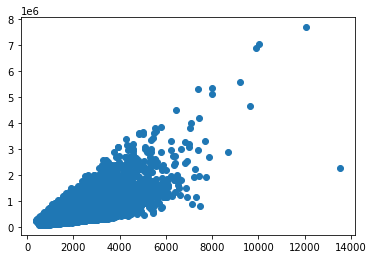

In [418]:
plt.scatter(X,y)

In [419]:
X_train.shape

(17276, 39)

In [420]:
X_test.shape

(4320, 39)

In [421]:
lr = LinearRegression()

lr.fit(X_train, y_train)

train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [422]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
17843,3,2.25,1980,8000,1.0,1560,420.0,1974,98023,47.3149,...,0,0,0,0,0,1,0,0,0,0
16911,3,1.00,890,9870,1.0,890,0.0,1960,98056,47.5398,...,0,0,0,1,0,0,0,0,0,0
20876,4,3.00,5370,69848,2.0,3500,1870.0,2005,98042,47.3166,...,0,0,0,0,0,0,1,0,0,0
14355,3,1.75,1600,8400,1.0,1600,0.0,1963,98006,47.5479,...,0,0,0,0,1,0,0,0,0,0
15790,3,2.25,2860,10625,1.0,1920,940.0,1976,98115,47.6915,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,6,3.50,2400,8620,2.0,1640,760.0,1987,98034,47.7152,...,0,0,0,0,1,0,0,0,0,0
21246,2,3.00,1650,960,3.0,1350,300.0,2015,98103,47.6611,...,0,0,0,0,1,0,0,0,0,0
1175,2,1.75,1280,7110,1.0,1000,280.0,1955,98118,47.5569,...,0,0,0,1,0,0,0,0,0,0
2934,4,2.50,3130,60467,2.0,3130,0.0,1996,98014,47.6618,...,0,0,0,0,0,1,0,0,0,0


In [423]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
3991,3,1.75,1350,7588,1.0,1350,0.0,1993,98010,47.3123,...,0,0,0,1,0,0,0,0,0,0
16939,3,1.50,1500,10018,1.0,1500,0.0,1957,98058,47.4680,...,0,0,0,1,0,0,0,0,0,0
9467,3,3.50,3580,95832,1.5,3580,0.0,2005,98038,47.4239,...,0,0,0,0,0,1,0,0,0,0
20168,3,3.25,4030,6300,2.0,3630,400.0,2006,98105,47.6664,...,0,0,0,0,0,0,1,0,0,0
10554,6,2.50,2890,8122,1.0,1630,1260.0,1977,98008,47.5886,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,3,1.50,720,7450,1.0,720,0.0,1924,98126,47.5840,...,0,1,0,0,0,0,0,0,0,0
5671,4,2.25,2910,10189,2.0,2910,0.0,1988,98006,47.5465,...,0,0,0,0,0,1,0,0,0,0
10944,3,1.00,860,5060,1.5,860,0.0,1927,98133,47.7062,...,0,0,0,1,0,0,0,0,0,0
18174,3,2.50,2044,5610,2.0,2044,0.0,1996,98033,47.6791,...,0,0,0,0,0,1,0,0,0,0


In [424]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds

In [425]:
train_residuals

17843     -3034.464954
16911   -134009.681052
20876   -402400.372684
14355    -12231.163391
15790     32669.471104
             ...      
1160     -50636.861621
21246      8422.365458
1175    -106443.621233
2934     -21143.965130
6619      75878.256475
Name: price, Length: 17276, dtype: float64

In [426]:
test_residuals

3991      67881.054298
16939     41762.392751
9467    -101492.415197
20168     69620.498490
10554    -89030.197925
             ...      
7369    -142078.167034
5671      85502.664970
10944    -76335.418225
18174     31706.893422
13008     18440.021811
Name: price, Length: 4320, dtype: float64

In [427]:
test_mse ** .5

193577.39691492892

In [428]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 13307067081.56891
Test Mean Squared Error: 13047128173.7965


copy and paste from model validation in canvas. 

Great, there does not seem to be a big difference between the train and test MSE! Interestingly, the test set error is smaller than the training set error. This is fairly rare but does occasionally happen.

In other words, our validation process has indicated that we are **not** overfitting. In fact, we may be _underfitting_ because linear regression is not a very complex model.

In [429]:
#Checking for normality

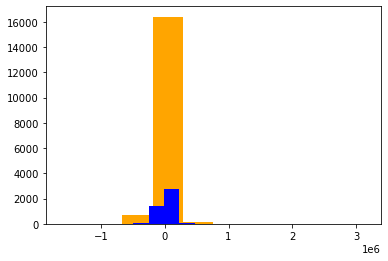

In [430]:
plt.hist(train_residuals, label='Train', color = 'orange')
plt.hist(test_residuals, label='Test', color = 'blue')

plt.show()

In [431]:
train_residuals

17843     -3034.464954
16911   -134009.681052
20876   -402400.372684
14355    -12231.163391
15790     32669.471104
             ...      
1160     -50636.861621
21246      8422.365458
1175    -106443.621233
2934     -21143.965130
6619      75878.256475
Name: price, Length: 17276, dtype: float64

In [432]:
#Checking for heteroskedasticity

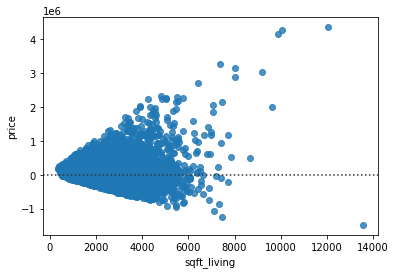

In [433]:
sns.residplot(x=X_train['sqft_living'], y=y_train)
plt.show()        

In [434]:
#Our simple model does not show heteroskedasticity and thus is not a good moodel regarding our assumptions.

In [435]:
#Heteroskadasticity for whole model; not great

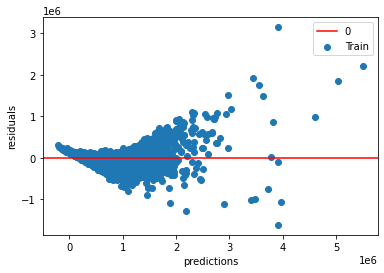

In [436]:
plt.scatter(train_preds, train_residuals, label='Train')

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

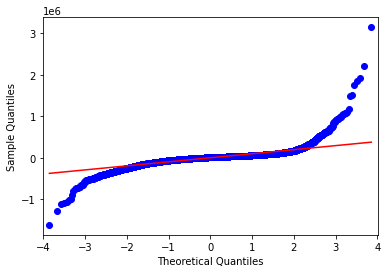

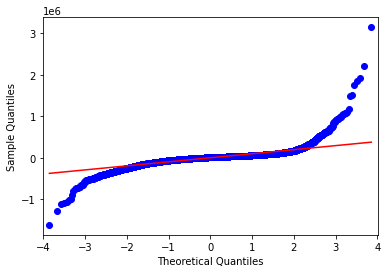

In [437]:
sm.qqplot(train_residuals, line = 'r')

In [438]:
## Other regressions prior to fitting that checked variables with high correlation to price

In [439]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
17843,3,2.25,1980,8000,1.0,1560,420.0,1974,98023,47.3149,...,0,0,0,0,0,1,0,0,0,0
16911,3,1.00,890,9870,1.0,890,0.0,1960,98056,47.5398,...,0,0,0,1,0,0,0,0,0,0
20876,4,3.00,5370,69848,2.0,3500,1870.0,2005,98042,47.3166,...,0,0,0,0,0,0,1,0,0,0
14355,3,1.75,1600,8400,1.0,1600,0.0,1963,98006,47.5479,...,0,0,0,0,1,0,0,0,0,0
15790,3,2.25,2860,10625,1.0,1920,940.0,1976,98115,47.6915,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,6,3.50,2400,8620,2.0,1640,760.0,1987,98034,47.7152,...,0,0,0,0,1,0,0,0,0,0
21246,2,3.00,1650,960,3.0,1350,300.0,2015,98103,47.6611,...,0,0,0,0,1,0,0,0,0,0
1175,2,1.75,1280,7110,1.0,1000,280.0,1955,98118,47.5569,...,0,0,0,1,0,0,0,0,0,0
2934,4,2.50,3130,60467,2.0,3130,0.0,1996,98014,47.6618,...,0,0,0,0,0,1,0,0,0,0


In [440]:
model100 = sm.OLS(y, sm.add_constant(X_train)).fit()
model100.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4636.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:28:15   Log-Likelihood:            -2.2588e+05
No. Observations:               17276   AIC:                         4.518e+05
Df Residuals:                   17241   BIC:                         4.521e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.356e+07   1.25e+06     10.826      0.000    1.11e+07     1.6e+07
bedrooms               6316.5790   1311.397      4.817      0.000    3746.108    8887.050
bathrooms              1.491e+04   2113.888      7.056      0.000    1.08e+04    1.91e+04
sqft_living             246.2034     11.652     21.131      0.000     223.365     269.042
sqft_lot                 -0.1003      0.030     -3.392      0.001      -0.158      -0.042
floors                -5985.9293   2367.086     -2.529      0.011   -1.06e+04   -1346.201
sqft_above               15.9596     11.625      1.373      0.170      -6.827      38.747
sqft_basement            20.6159     11.498      1.793      0.073      -1.922      43.154
yr_built                -33.9379     47.436     -0.715      0.474    -126.917      59.042
zipcode                -194.1046     21.762     -8.919      0.000    -236.761    -151.448
lat                   -5.123e+04   9143.368     -5.603      0.000   -6.92e+04   -3.33e+04
long                   2.859e+04   1.05e+04      2.713      0.007    7934.433    4.92e+04
sqft_living15           -16.7043      2.246     -7.437      0.000     -21.107     -12.302
sqft_lot15               -0.1908      0.047     -4.017      0.000      -0.284      -0.098
price_per_sqft_living  1909.5592     12.136    157.353      0.000    1885.772    1933.346
distance_from_Seattle -1998.9222    284.214     -7.033      0.000   -2556.010   -1441.834
view_AVERAGE           2.686e+06    2.5e+05     10.722      0.000    2.19e+06    3.18e+06
view_EXCELLENT         2.761e+06   2.51e+05     11.003      0.000    2.27e+06    3.25e+06
view_FAIR              2.712e+06   2.51e+05     10.823      0.000    2.22e+06     3.2e+06
view_GOOD              2.723e+06   2.51e+05     10.859      0.000    2.23e+06    3.21e+06
view_NONE              2.679e+06    2.5e+05     10.711      0.000    2.19e+06    3.17e+06
waterfront_NO          4.441e+06   4.17e+05     10.640      0.000    3.62e+06    5.26e+06
waterfront_UNKNOWN     4.443e+06   4.17e+05     10.646      0.000    3.63e+06    5.26e+06
waterfront_YES         4.677e+06   4.18e+05     11.190      0.000    3.86e+06     5.5e+06
condition_Poor           2.7e+06   2.51e+05     10.757      0.000    2.21e+06    3.19e+06
condition_Fair         2.734e+06   2.51e+05     10.907      0.000    2.24e+06    3.23e+06
condition_Average      2.699e+06   2.51e+05     10.762      0.000    2.21e+06    3.19e+06
condition_Good         2.709e+06   2.51e+05     10.811      0.000    2.22e+06     3.2e+06
condition_Very Good    2.719e+06   2.51e+05     10.850      0.000    2.23e+06    3.21e+06
grade_3 Poor           -5.18e-11    4.2e-12    -12.324      0.000      -6e-11   -4.36e-11
grade_4 Low            1.067e+06   1.27e+05      8.420      0.000    8.18e+05    1.31e+06
grade_5 Fair           

In [441]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,188.050847,7.644653
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,209.338521,7.872439
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,233.766234,10.220653
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,308.163265,6.549707
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,303.571429,13.655673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509,235.294118,6.342232
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200,173.160173,6.802472
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007,394.216667,1.999258
21595,400000.0,3,2.50,1600,2388,2.0,UNKNOWN,NONE,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287,250.000000,13.511845


In [442]:
X_new = X_train[['bedrooms','bathrooms', 'distance_from_Seattle']]
y_train

17843     295000.0
16911     358000.0
20876     790000.0
14355     480000.0
15790    1190000.0
           ...    
1160      435000.0
21246     559000.0
1175      585000.0
2934      685530.0
6619      367500.0
Name: price, Length: 17276, dtype: float64

In [443]:
model101 = sm.OLS(endog=y_train, exog=sm.add_constant(X_new)).fit()

In [444]:
model101.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     3699.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:28:15   Log-Likelihood:            -2.4160e+05
No. Observations:               17276   AIC:                         4.832e+05
Df Residuals:                   17272   BIC:                         4.832e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.342e+05   9173.231     14.630      0.000    1.16e+05    1.52e+05
bedrooms               2.585e+04   2827.210      9.142      0.000    2.03e+04    3.14e+04
bathrooms              2.504e+05   3341.548     74.931      0.000    2.44e+05    2.57e+05
distance_from_Seattle -1.822e+04    327.842    -55.579      0.000   -1.89e+04   -1.76e+04
==============================================================================
Omnibus:                    15222.538   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1284040.509
Skew:                           3.854   Prob(JB):                         0.00
Kurtosis:                      44.526   Cond. No.                         59.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [445]:
lr = LinearRegression()

lr.fit(X_new, y_train)

train_preds = lr.predict(X_new)

In [446]:
train_residuals = y_train - train_preds

In [447]:
lr.score(X_new, y_train)

0.3911630779488904

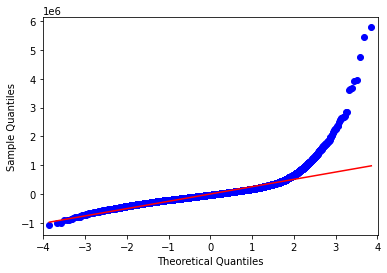

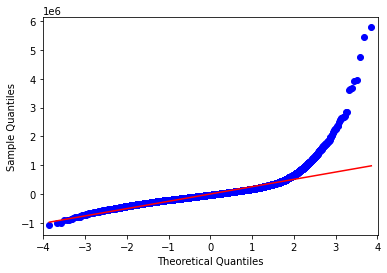

In [448]:
import statsmodels.api as sm

sm.qqplot(train_residuals, line = 'r')


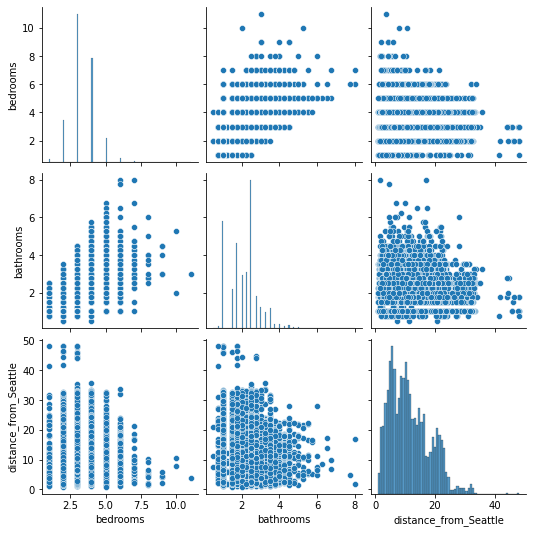

In [449]:
sns.pairplot(X_new)
plt.show()

In [450]:
sns.scatterplot(X_new, y_new)

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

In [ ]:
plt.scatter(X_new, y_new)

In [ ]:
print(X_new.shape, y_new.shape)

In [ ]:
ss = StandardScaler()
ss.fit(data)

In [ ]:
y = data['price']
X = data[['sqft_basement', 'bedrooms', 'bathrooms']]

lr = sm.OLS(endog=y, exog=sm.add_constant(X))

In [ ]:
simple_model_summary10 = lr.fit().summary()

In [451]:
simple_model_summary10

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     3230.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:05:10   Log-Likelihood:            -3.0337e+05
No. Observations:               21596   AIC:                         6.068e+05
Df Residuals:                   21592   BIC:                         6.068e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6252.2588   8229.064      0.760      0.447   -9877.315    2.24e+04
sqft_basement   156.3642      5.005     31.240      0.000     146.553     166.175
bedrooms       5071.8744   2662.177      1.905      0.057    -146.190    1.03e+04
bathrooms      2.232e+05   3187.727     70.019      0.000    2.17e+05    2.29e+05
==============================================================================
Omnibus:                    16692.730   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           783576.817
Skew:                           3.306   Prob(JB):                         0.00
Kurtosis:                      31.759   Cond. No.                     2.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [452]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
17843,3,2.25,1980,8000,1.0,1560,420.0,1974,98023,47.3149,...,0,0,0,0,0,1,0,0,0,0
16911,3,1.00,890,9870,1.0,890,0.0,1960,98056,47.5398,...,0,0,0,1,0,0,0,0,0,0
20876,4,3.00,5370,69848,2.0,3500,1870.0,2005,98042,47.3166,...,0,0,0,0,0,0,1,0,0,0
14355,3,1.75,1600,8400,1.0,1600,0.0,1963,98006,47.5479,...,0,0,0,0,1,0,0,0,0,0
15790,3,2.25,2860,10625,1.0,1920,940.0,1976,98115,47.6915,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,6,3.50,2400,8620,2.0,1640,760.0,1987,98034,47.7152,...,0,0,0,0,1,0,0,0,0,0
21246,2,3.00,1650,960,3.0,1350,300.0,2015,98103,47.6611,...,0,0,0,0,1,0,0,0,0,0
1175,2,1.75,1280,7110,1.0,1000,280.0,1955,98118,47.5569,...,0,0,0,1,0,0,0,0,0,0
2934,4,2.50,3130,60467,2.0,3130,0.0,1996,98014,47.6618,...,0,0,0,0,0,1,0,0,0,0


In [455]:
X_train['grade_7 Average'] == 1

17843    False
16911     True
20876    False
14355    False
15790    False
         ...  
1160     False
21246    False
1175      True
2934     False
6619     False
Name: grade_7 Average, Length: 17276, dtype: bool

In [457]:
sns.scatterplot(data)

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

In [461]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,188.050847,7.644653
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,209.338521,7.872439
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,233.766234,10.220653
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,308.163265,6.549707
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,303.571429,13.655673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509,235.294118,6.342232
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200,173.160173,6.802472
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007,394.216667,1.999258
21595,400000.0,3,2.50,1600,2388,2.0,UNKNOWN,NONE,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287,250.000000,13.511845


In [475]:
data['bed_bath'] = (data.bedrooms / data.bathrooms)

In [479]:
data['sqft_bed'] = (data.sqft_living / data.bedrooms)

In [486]:
data['sqft_bed_bath'] = (data.sqft_living) / (data.bedrooms + data.bathrooms)

In [487]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle,bed_bath,sqft_bed,sqft_bed_bath
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,...,98178,47.5112,-122.257,1340,5650,188.050847,7.644653,3.000000,393.333333,295.000000
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,...,98125,47.7210,-122.319,1690,7639,209.338521,7.872439,1.333333,856.666667,489.523810
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,...,98028,47.7379,-122.233,2720,8062,233.766234,10.220653,2.000000,385.000000,256.666667
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,...,98136,47.5208,-122.393,1360,5000,308.163265,6.549707,1.333333,490.000000,280.000000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,...,98074,47.6168,-122.045,1800,7503,303.571429,13.655673,1.500000,560.000000,336.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,...,98103,47.6993,-122.346,1530,1509,235.294118,6.342232,1.200000,510.000000,278.181818
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,...,98146,47.5107,-122.362,1830,7200,173.160173,6.802472,1.600000,577.500000,355.384615
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,...,98144,47.5944,-122.299,1020,2007,394.216667,1.999258,2.666667,510.000000,370.909091
21595,400000.0,3,2.50,1600,2388,2.0,UNKNOWN,NONE,Average,8 Good,...,98027,47.5345,-122.069,1410,1287,250.000000,13.511845,1.200000,533.333333,290.909091


In [494]:
y = data['price']
X = data[['sqft_bed']]

lr = sm.OLS(endog=y, exog=sm.add_constant(X))

In [495]:
simple_model_summary20 = lr.fit().summary()
simple_model_summary20

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                 1.095e+04
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:04:23   Log-Likelihood:            -3.0295e+05
No. Observations:               21596   AIC:                         6.059e+05
Df Residuals:                   21594   BIC:                         6.059e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.986e+04   6175.663    -11.312      0.000    -8.2e+04   -5.78e+04
sqft_bed     987.0803      9.432    104.655      0.000     968.593    1005.567
==============================================================================
Omnibus:                    16855.805   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           973090.698
Skew:                           3.281   Prob(JB):                         0.00
Kurtosis:                      35.224   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""